# testing rock physics models added to bruges

From this pull request: <https://github.com/agile-geoscience/bruges/pull/79>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lasio

%cd ../bruges
import bruges.rockphysics.rockphysicsmodels as brp
%cd ../geophysical_notes

C:\Users\ag19324\GoogleDrive\PYTHON\_GITHUB\bruges
C:\Users\ag19324\GoogleDrive\PYTHON\_GITHUB\geophysical_notes


In [2]:
%load_ext autoreload
%autoreload 2

### soft sand model

Reproducing the results from the example at page 260 of Mavko et al., _The Rock Physics Handbook_ (2009):

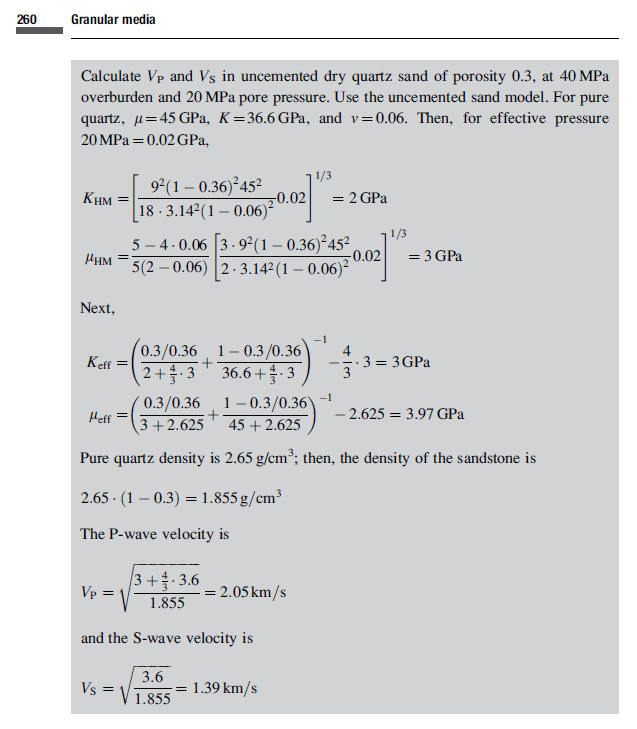

In [3]:
from IPython.display import Image
Image(filename='Mavko_2009_pag260.png', width=600)

Note that the bulk and shear elastic moduli ($K$ and $\mu$ from the book's example above, `K` and `G` in the code block below) are in GPa, density is in g/cc, pressure in MPa.

When calculating the final velocities with:

$$ V_p = \sqrt{ \frac{K + 4/3 \mu}{rho}} ;  V_s = \sqrt{ \frac{\mu}{rho}} $$


remember that with these input units the output will be in km/s. To get velocities in m/s just use Pa for the moduli and kg/m3 for density; i.e. `K = K * 1e9` and `rho = rho * 1e3`.

In [7]:
K0,G0,D0 = 36.6,45,2.65
sigma =20
phi = 0.3

Khm,Ghm = brp.hertz_mindlin(K0, G0, sigma, phi_c=0.36, Cn=9)
Kd,Gd = brp.soft_sand(K0, G0, phi, sigma, phi_c=0.36, Cn=9)

rho = D0*(1-phi)
vp_soft = np.sqrt((Kd+4/3*Gd)/rho)
vs_soft = np.sqrt(Gd/rho)

print('Hertz-Mindlin pure quartz at effective pressure={} MPa, phi_c={:.2f}: K={:.2f} GPa, G={:.2f} GPa'.format(sigma,.36,Khm,Ghm))
print('Soft sand model at porosity={:.2f}: K={:.2f} GPa, G={:.2f} GPa'.format(phi,Kd,Gd))
print('Soft sand model velocities at porosity={:.2f}: Vp={:.2f} km/s, Vs={:.2f} km/s, rho={:.3f} g/cc'.format(phi,vp_soft,vs_soft,rho))

Hertz-Mindlin pure quartz at effective pressure=20 MPa, phi_c=0.36: K=2.05 GPa, G=3.02 GPa
Soft sand model at porosity=0.30: K=3.05 GPa, G=3.99 GPa
Soft sand model velocities at porosity=0.30: Vp=2.12 km/s, Vs=1.47 km/s, rho=1.855 g/cc


I think the differences with the example from the book (3.05 GPa instead of 3 for the dry bulk modulus, 2.12 km/s instead of 2.05 for Vp, etc.) are just a consequence of rounding off floats.

### soft and stiff sand model

Reproducing the results from figure 5.4.7 at page 261 of _The Rock Physics Handbook_. Will not bother with Raymer-Hunt-Gardner and intermediate stiff sand models. Use different linewidths to better differentiate between Stiff and Soft Sand models. Also please note that the P-wave modulus is $K + 4/3 \mu = \rho {V_p}^2$.

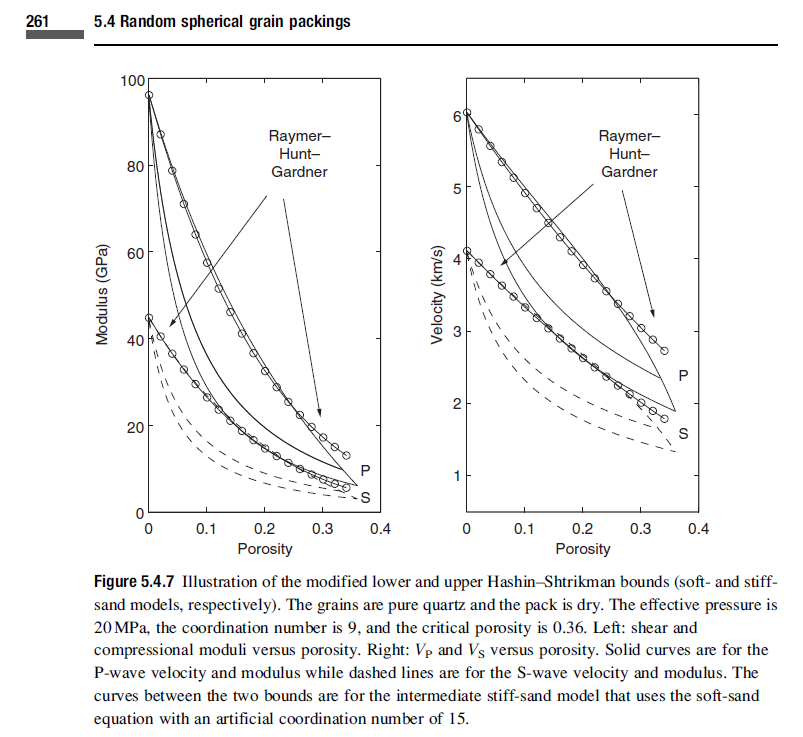

In [8]:
Image(filename='Mavko_2009_fig547.png', width=800)

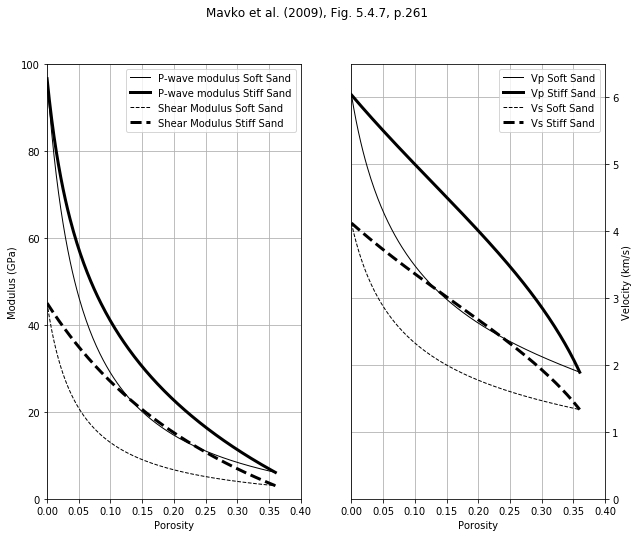

In [9]:
phi = np.linspace(0,0.36,200)

Kd_soft,Gd_soft = brp.soft_sand(K0, G0, phi, sigma, phi_c=0.36, Cn=9)
Kd_stiff,Gd_stiff = brp.stiff_sand(K0, G0, phi, sigma, phi_c=0.36, Cn=9)

rho = D0*(1-phi)
vp_soft = np.sqrt((Kd_soft+4/3*Gd_soft)/rho)
vs_soft = np.sqrt(Gd_soft/rho)

vp_stiff = np.sqrt((Kd_stiff+4/3*Gd_stiff)/rho)
vs_stiff = np.sqrt(Gd_stiff/rho)


f,ax=plt.subplots(1,2,figsize=(10,8))
ax[0].plot(phi,Kd_soft+4/3*Gd_soft, '-k', lw=1, label='P-wave modulus Soft Sand')
ax[0].plot(phi,Kd_stiff+4/3*Gd_soft, '-k', lw=3, label='P-wave modulus Stiff Sand')
ax[0].plot(phi,Gd_soft, '--k', lw=1, label='Shear Modulus Soft Sand')
ax[0].plot(phi,Gd_stiff, '--k', lw=3, label='Shear Modulus Stiff Sand')

ax[1].plot(phi,vp_soft, '-k', lw=1, label='Vp Soft Sand')
ax[1].plot(phi,vp_stiff, '-k', lw=3, label='Vp Stiff Sand')
ax[1].plot(phi,vs_soft, '--k', lw=1, label='Vs Soft Sand')
ax[1].plot(phi,vs_stiff, '--k', lw=3, label='Vs Stiff Sand')

# ax[1].plot(phi,Gd_soft, '--k', lw=1, label='Shear Modulus Soft Sand')
# ax[1].plot(phi,Gd_stiff, '--k', lw=3, label='Shear Modulus Stiff Sand')

#ax[0].plot(phi,vp_soft, label='soft sand model')
#ax[0].plot(phi,vp_stiff, label='stiff sand model')
ax[0].set_ylim(0,100)
ax[1].set_ylim(0,6.5)
ax[0].set_ylabel('Modulus (GPa)')
ax[1].set_ylabel('Velocity (km/s)')
ax[1].yaxis.tick_right()
ax[1].yaxis.set_label_position('right')
for aa in ax:
    aa.set_xlim(0,0.4)
    aa.legend(fontsize='medium')
    aa.grid()
    aa.set_xlabel('Porosity')
f.suptitle('Mavko et al. (2009), Fig. 5.4.7, p.261');

### contact cement model

Reproducing the results from Dvorkin & Nur, _Elasticity of High-Porosity Sandstones: Theory for Two North Sea Data Sets_, Geophysics (1996), figure 5. The three subplots only differ for the plot of the Oseberg samples at different confining pressures, but it is only relevent for this exercise comparing the plots of the theoretical models which are the same for the three plots.

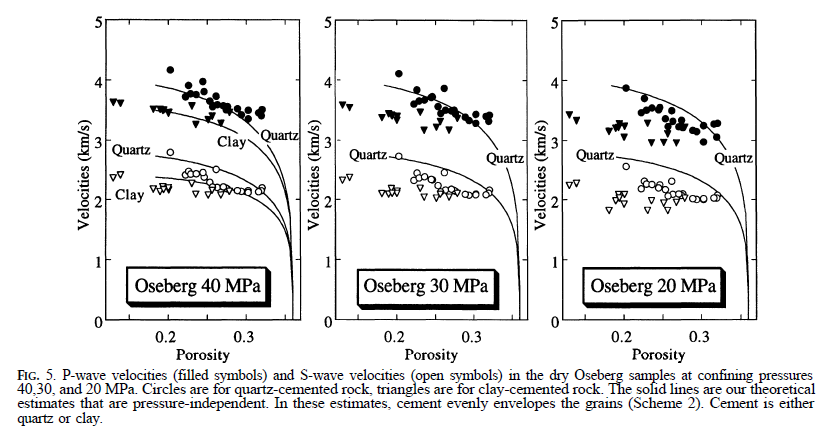

In [10]:
Image(filename='Dvorkin-Nur_1996_fig5.png', width=800)

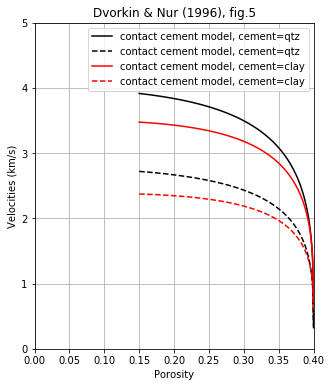

In [11]:
K0,G0,D0 = 38,44,2.65
phi = np.linspace(0.15,0.4,200)

rho = D0*(1-phi)
Kc, Gc = 36.6, 45 # quartz cement
Kd,Gd = brp.contact_cement(K0, G0, phi, Kc=Kc, Gc=Gc)
vp_cc_qtz = np.sqrt((Kd+4/3*Gd)/rho)
vs_cc_qtz = np.sqrt(Gd/rho)

Kc, Gc = 21, 7 # clay cement
Kd,Gd = brp.contact_cement(K0, G0, phi, Kc=Kc, Gc=Gc)
vp_cc_cl = np.sqrt((Kd+4/3*Gd)/rho)
vs_cc_cl = np.sqrt(Gd/rho)

f,ax=plt.subplots(figsize=(5,6))
ax.plot(phi,vp_cc_qtz, 'k-', label='contact cement model, cement=qtz')
ax.plot(phi,vs_cc_qtz, 'k--', label='contact cement model, cement=qtz')
ax.plot(phi,vp_cc_cl, 'r-', label='contact cement model, cement=clay')
ax.plot(phi,vs_cc_cl, 'r--', label='contact cement model, cement=clay')
ax.set_xlim(0,0.4)
ax.set_ylim(0,5)
ax.set_xlabel('Porosity')
ax.set_ylabel('Velocities (km/s)')
ax.legend(fontsize='medium')
ax.grid()
ax.set_title('Dvorkin & Nur (1996), fig.5');

### Vernik & Kachanov consolidated sandstone model

Reproducing the results from Vernik & Kachanov, _Modeling Elastic Properties of Siliciclastic Rocks_, Geophysics (2010), figure 4.

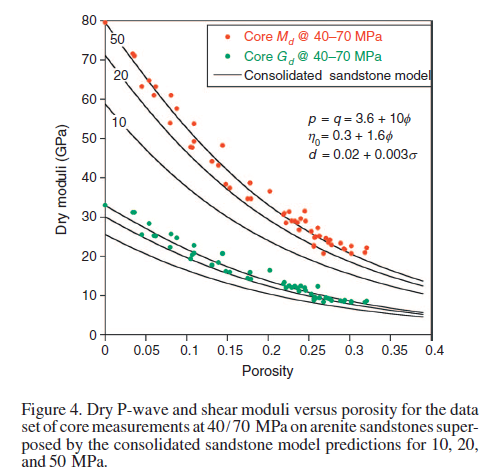

In [12]:
Image(filename='Vernik_2010_fig4.png', width=400)

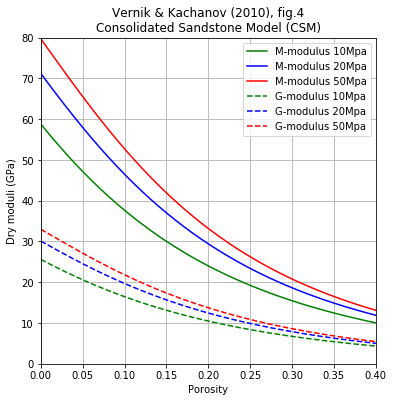

In [14]:
K0,G0 = 35.7,33
phi = np.linspace(0,.5,200)

Kd_10, Gd_10 = brp.vernik_consol_sand(K0,G0,phi,sigma=10)
Kd_20, Gd_20 = brp.vernik_consol_sand(K0,G0,phi,sigma=20)
Kd_50, Gd_50 = brp.vernik_consol_sand(K0,G0,phi,sigma=50)

f,ax=plt.subplots(figsize=(6,6))
ax.plot(phi,Kd_10+4/3*Gd_10,'-g', label='M-modulus 10Mpa')
ax.plot(phi,Kd_20+4/3*Gd_20,'-b', label='M-modulus 20Mpa')
ax.plot(phi,Kd_50+4/3*Gd_50,'-r', label='M-modulus 50Mpa')
ax.plot(phi,Gd_10,'--g', label='G-modulus 10Mpa')
ax.plot(phi,Gd_20,'--b', label='G-modulus 20Mpa')
ax.plot(phi,Gd_50,'--r', label='G-modulus 50Mpa')
ax.set_xlim(0,0.4)
ax.set_ylim(0,80)
ax.set_xlabel('Porosity')
ax.set_ylabel('Dry moduli (GPa)')
ax.legend(fontsize='medium')
ax.grid()
ax.set_title('Vernik & Kachanov (2010), fig.4\nConsolidated Sandstone Model (CSM)');

### Vernik & Kachanov sandstone diagenesis model

Reproducing the results from Vernik & Kachanov, _Modeling Elastic Properties of Siliciclastic Rocks_, Geophysics (2010), figure 5.

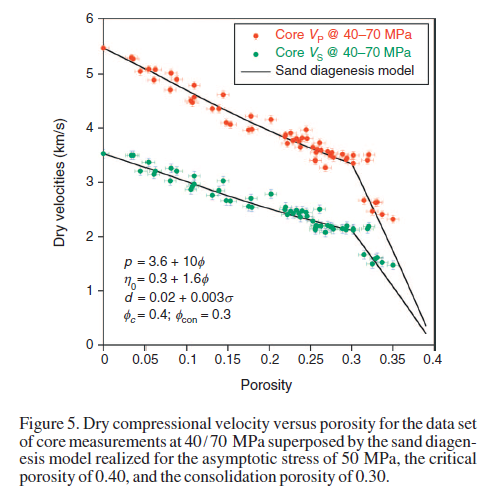

In [15]:
Image(filename='Vernik_2010_fig5.png', width=400)

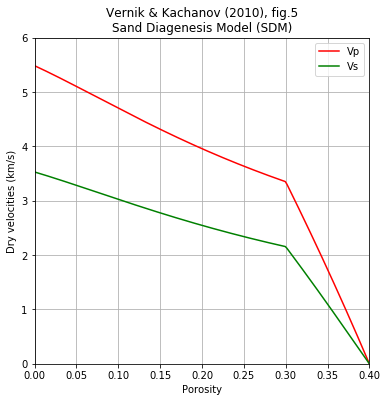

In [17]:
K0,G0,D0 = 35.7,33,2.65
phi = np.linspace(0,.4,200)

rho = D0*(1-phi)
Kd, Gd = brp.vernik_sand_diagenesis(K0,G0,phi,sigma=50,phi_c=0.4,phi_con=0.3)
vp = np.sqrt((Kd + 4/3*Gd)/rho)
vs = np.sqrt(Gd/rho)

f,ax=plt.subplots(figsize=(6,6))
ax.plot(phi,vp,'-r', label='Vp')
ax.plot(phi,vs,'-g', label='Vs')
ax.set_xlim(0,0.4)
ax.set_ylim(0,6)
ax.set_xlabel('Porosity')
ax.set_ylabel('Dry velocities (km/s)')
ax.legend(fontsize='medium')
ax.grid()
ax.set_title('Vernik & Kachanov (2010), fig.5\nSand Diagenesis Model (SDM)');

### Vernik & Kachanov shale model

Reproducing the results from Vernik & Kachanov, _Modeling Elastic Properties of Siliciclastic Rocks_, Geophysics (2010), figure 11.

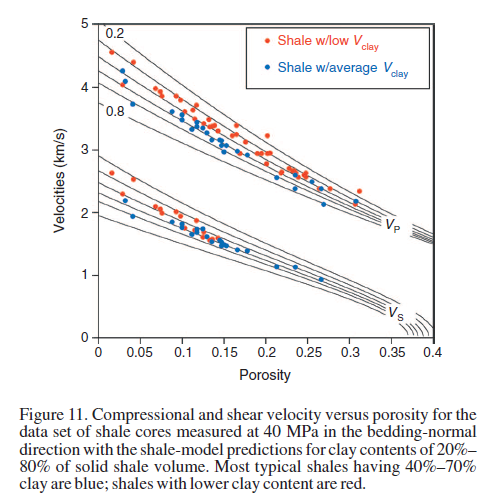

In [18]:
Image(filename='Vernik_2010_fig11.png', width=400)

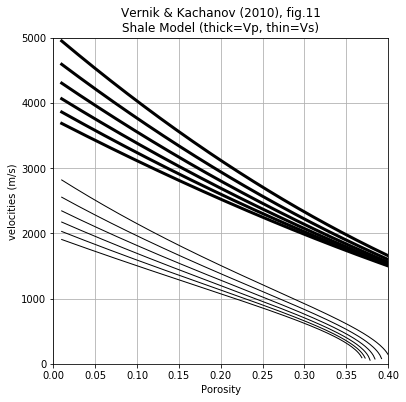

In [21]:
vv = np.linspace(0.2,0.8,6)
phi = np.linspace(0.01,0.4,200)

f,ax=plt.subplots(figsize=(6,6))
for i in vv:
    vp, vs, rho = brp.vernik_shale(i, phi)
    ax.plot(phi,vp,'-k', lw=3)
    ax.plot(phi,vs,'-k', lw=1) 
ax.set_xlim(0,0.4)
ax.set_ylim(0,5e3)
ax.set_xlabel('Porosity')
ax.set_ylabel('velocities (m/s)')
# ax.legend(fontsize='medium')
ax.grid()
ax.set_title('Vernik & Kachanov (2010), fig.11\nShale Model (thick=Vp, thin=Vs)');

### Vernik & Kachanov soft sand model 2

Reproducing the results from Vernik & Kachanov, _Modeling Elastic Properties of Siliciclastic Rocks_, Geophysics (2010), figure 9. Only the "consolidated sand model" lines will be plotted. The Soft Sand Model 2 as it is called in the library, can be found at eq.14 in the paper:

$$ M_{dry} = M_0 \Big( 1 + p \frac{\phi}{1-phi} \Big)^{-1}  $$

$$ G_{dry} = G_0 \Big( 1 + q \frac{\phi}{1-phi} \Big)^{-1}  $$
    

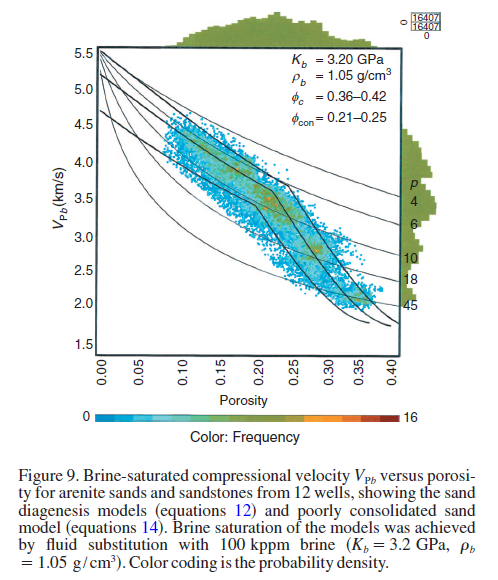

In [15]:
Image(filename='Vernik_2010_fig9.png', width=400)

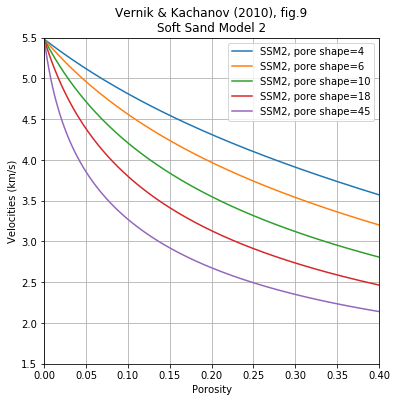

In [22]:
K0,G0,D0 = 35.6,33,2.65
phi= np.linspace(0,0.4,200)
poreshape=[4,6,10,18,45]
Kf, Df = 3.20, 1.05

f,ax=plt.subplots(figsize=(6,6))
for mm in poreshape:
    Kd, Gd = brp.vernik_soft_sand_2(K0,G0,phi,p=mm,q=mm)
    vp,*_ = brp.vels(Kd,Gd,K0,D0,Kf,Df,phi)
    ax.plot(phi,vp/1e3, label='SSM2, pore shape={}'.format(mm))
ax.set_xlim(0,0.4)
ax.set_ylim(1.5,5.5)
ax.set_xlabel('Porosity')
ax.set_ylabel('Velocities (km/s)')
ax.legend(fontsize='medium')
ax.grid()
ax.set_title('Vernik & Kachanov (2010), fig.9\nSoft Sand Model 2');

## create synthetic logs

A small example on how to create Vp, Vs and density logs from scratch, using a rock physics model:

1. assign mineral and fluid elastic parameters.
2. create arbitrary depth array.
3. initialize petrophysical volume logs: porosity (`phi`), shale and sand volumes (`vsh`, `vqz`), water saturation (`sw`).
4. assume that the entire log is shale, then define an interval where we want to place reservoir sands (`res`, identified by the interval `top`-`base`).
5. assign 30% porosity and 10% water saturation in the reservoir interval, outside of it they will be 0% and 100%.
6. add some random variations to the porosity and water saturation logs.
7. fill in the mineralogical volumes by assigning some very low random numbers to the sand volume, then increasing it by about 40% in the reservoir interval, and replacing the rest with shale volume with the constraint that `phi + vsh + vqz = 1`.

_...continues below..._

In [23]:
#--- elastic moduli for minerals and fluids
#--- bulk and shear moduli in GPa, density in g/cc
Dsh, Ksh, Gsh    = 2.4, 15, 5
Dqz, Kqz, Gqz    = 2.6, 37, 44
Dcar, Kcar, Gcar = 2.7, 76, 32
Dcar, Kcar, Gcar = 2.2, 20, 10
Db, Kb = 1.1, 2.2
Do, Ko = 0.8, 1.5
Dg, Kg = 0.2, 0.06
hc='gas'
if hc=='oil':
    Dhc, Khc = Do, Ko
else:
    Dhc, Khc = Dg, Kg
    
#--- creates dummy depth scale and empty petrophysical logs
ns=100
top,base=30,50
z=np.arange(ns)
phi,vsh,vqz = (np.zeros(ns) for _ in range(3))
sw = np.ones(ns)

#--- cuts out a reservoir section between top and base
#--- and assigns higher porosity and lower Sw
res = (z>=top) & (z<base)
phi[res] = 0.3
sw[res] = 0.1
ns_res = np.count_nonzero(res)

#--- adds random variations to Phi and Sw
phi[~res] += np.random.rand(ns-ns_res)*.05
phi[res] += np.random.rand(ns_res)*.2
sw[res] -= np.random.rand(ns_res)*.1

#--- fills in mineralogical fraction volumes
vqz = np.random.rand(ns)*.15*(1-phi)
vqz[res] += .4
vsh = 1-phi-vqz

_..._

8. Normalize mineral volumes and calculate average matrix mineral properties using the Voigt-Reuss-Hill average (`bruges.rockphysics.vrh`) for bulk (`K0`) and shear (`G0`) elastic moduli
9. calculate average fluid properties using the Reuss average

_...continues below..._

In [24]:
from bruges.rockphysics import vrh

#--- normalize mineral volumes
vshN = vsh/(1-phi)
vqzN = vqz/(1-phi)

#--- computes rock matrix elastic moduli via Voigt-Reuss-Hill average
K0 = vrh(Ksh,Kqz,vshN)
G0 = vrh(Gsh,Gqz,vshN)
D0 = vshN*Dsh+vqzN*Dqz

#--- computes total fluid elastic moduli via Reuss average
f = np.array([sw,1-sw]).T
k = np.resize(np.array([Kb,Khc]),np.shape(f))
Kf = 1./np.sum(f/k,axis=1)
Df = sw*Db+(1-sw)*Dhc

_..._

10. use the Soft Sand model (`bruges.rockphysics.rpmodels.softsand`) to calculate dry rock properties then the final saturated velocities using Gassmann's equation (`bruges.rockphysics.rpmodels.vels`)
11. assemble all these synthetic logs into a Pandas DataFrame to inspect, plot etc

In [35]:
#--- use soft sand model to create velocities and density logs
Kdry, Gdry = brp.soft_sand(K0, G0, phi, sigma)
#Kdry, Gdry = brp.stiff_sand(K0, G0, phi, sigma=20)
vp,vs,rho,_= brp.vels(Kdry,Gdry,K0,D0,Kf,Df,phi)

#--- assemble everything into a Pandas DataFrame
temp={'VQZ':vqz,'VSH':vsh,'PHIE':phi,'SWE':sw,'VP':vp,'VS':vs,'RHO':rho}
ww = pd.DataFrame(data=temp, index=z)
ww.index.rename('DEPTH', inplace=True)

For example, these are the final velocities and density averaged over the entire sequence:

In [26]:
ww[['VP','VS','RHO']].describe()

,VP,VS,RHO
count,100.000000,100.000000,100.000000
mean,2740.482028,1426.961048,2.243879
std,569.627368,195.469640,0.283455
min,1439.729364,1034.472365,1.436910
25%,2765.051184,1298.677398,2.345941
50%,2971.802194,1469.327363,2.377766
75%,3092.359842,1573.838174,2.396260
max,3345.806451,1782.507620,2.422799


And these are similar stats only on the reservoir section; using another rock physics model (e.g., Stiff Sand instead of Soft Sand) we would obtain higher values.

In [37]:
ww[['VP','VS','RHO']][res].describe()

,VP,VS,RHO
count,20.000000,20.000000,20.000000
mean,1645.729133,1121.851906,1.688405
std,88.108985,41.037519,0.102910
min,1439.729364,1034.472365,1.436910
25%,1619.211765,1106.014159,1.653444
50%,1644.909922,1117.361654,1.708482
75%,1692.407080,1150.256442,1.737426
max,1789.551126,1199.272756,1.827176


And finally using the `plot` method of Pandas we can easily get a rough summary plot of this synthetic dataset.

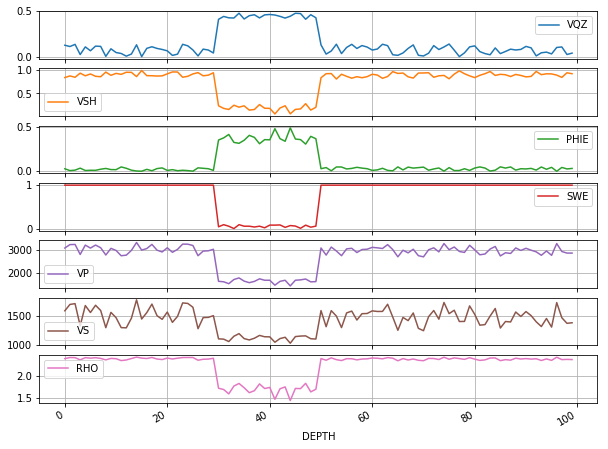

In [27]:
ww.plot(subplots=True,figsize=(10,8), grid=True);

**Exercises**

* create another dataset using a different rock physics model
* perform fluid replacement on the two datasets
* compare results
* calculate AVO curves at top reservoir